# Project 2 - Ames Housing Data and Kaggle Challenge (04_EDA_Modelling)

## Libaries Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics

%matplotlib inline 

In [2]:
# Setting Max columns
pd.options.display.max_columns = None

#### Data Import - train set

In [3]:
# Read from clean and encoded train csv
train = pd.read_csv('../datasets/train_clean_enc.csv')

In [4]:
# Checking rows and columns of clean and encoded train set
train.shape

(1937, 205)

In [5]:
# Listing columns of clean and encoded train set
train[train.columns].head()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,zoning_C,zoning_FV,zoning_I,zoning_RH,zoning_RL,zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,ext2exterior_2ndnd_AsphShn,ext2exterior_2ndnd_Brk Cmn,ext2exterior_2ndnd_BrkFace,ext2exterior_2ndnd_CBlock,ext2exterior_2ndnd_CmentBd,ext2exterior_2ndnd_HdBoard,ext2exterior_2ndnd_ImStucc,ext2exterior_2ndnd_MetalSd,ext2exterior_2ndnd_Other,ext2exterior_2ndnd_Plywood,ext2exterior_2ndnd_PreCast,ext2exterior_2ndnd_Stone,ext2exterior_2ndnd_Stucco,ext2exterior_2ndnd_VinylSd,ext2exterior_2ndnd_Wd Sdng,ext2exterior_2ndnd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_None,misc_feature_Gar2,misc_feature_None,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,saleprice
0,109,533352170,60,0.0,13517,2,3,2,6,8,1976,2005,289.0,3,2,3,3,1,6,533.0,1,0.0,192.0,725.0,4,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,1976,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,0,3,2010,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,130500
1,544,531379050,60,43.0,11492,2,3,2,7,5,1996,1997,132.0,3,2,4,3,1,6,637.0,1,0.0,276.0,913.0,4,4,

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Columns: 205 entries, id to saleprice
dtypes: float64(10), int64(195)
memory usage: 3.0 MB


In [7]:
# Getting the total null values for the all columns in merged dataset
train_enc_null = pd.DataFrame(train.isnull().sum(), columns = ['null_count']).sort_values(by = 'null_count',ascending = False)
train_enc_null = train_enc_null[train_enc_null['null_count'] > 0].sort_values('null_count', ascending=False).sort_index()

# Checking there are no null values
train_enc_null

,null_count


In [8]:
# To strip columns of train dataset and assigned it to train.columns
train.columns = [col.strip() for col in train.columns]
train.columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'lot_shape',
       'utilities', 'land_slope', 'overall_qual', 'overall_cond',
       ...
       'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD', 'sale_type_ConLI',
       'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth', 'sale_type_VWD',
       'sale_type_WD', 'saleprice'],
      dtype='object', length=205)

### Breaking down into age of property

In [9]:
# Age of property in years
# Difference in the years from time of housing sold and time of housing built
train['prop_age'] = train['yr_sold'] - train['year_built']

In [10]:
# Age of remodelling/adding property in years
# Difference in the years from time of housing sold and time of housing remodelled
train['remod_age'] = train['yr_sold'] - train['year_remod/add']

In [11]:
# Checking the relationship property age and remodel age with the other timelines
train[['yr_sold', 'year_built', 'year_remod/add', 'prop_age', 'remod_age']].head()

,yr_sold,year_built,year_remod/add,prop_age,remod_age
0,2010,1976,2005,34,5
1,2009,1996,1997,13,12
2,2010,1953,2007,57,3
3,2010,2006,2007,4,3
4,2010,1900,1993,110,17


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Columns: 207 entries, id to remod_age
dtypes: float64(10), int64(197)
memory usage: 3.1 MB


In [13]:
# Getting the total null values for the all columns in merged dataset
train_enc_null = pd.DataFrame(train.isnull().sum(), columns = ['null_count']).sort_values(by = 'null_count',ascending = False)
train_enc_null = train_enc_null[train_enc_null['null_count'] > 0].sort_values('null_count', ascending=False).sort_index()

# Checking there are no null values
train_enc_null

,null_count


### EDA - Pairplot

In [14]:
# Exploring a set of dataset with relation to qualities and possibly high correlation
y_vars1 = ['overall_qual',
          'exter_qual',
          'gr_liv_area',
          'kitchen_qual',
          'foundation_PConc',
          'neighborhood_NridgHt',
          'garage_type_Detchd',
          'remod_age',
          'prop_age']

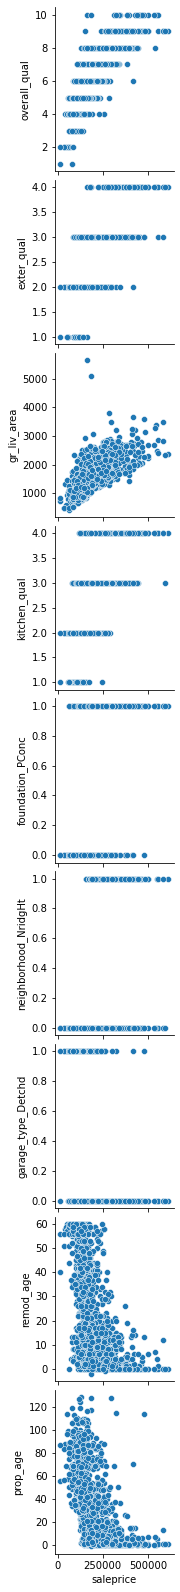

In [15]:
# Plotting pairplot to check and any visiable relation of features to saleprice
sns.pairplot(train, 
             x_vars = ['saleprice'],
             y_vars = y_vars1,
             diag_kind=None)


`overall_qual` and `gr_liv_area` seem to have an increasing trend to them where the higher the overall quality or ground living area, the higher the sale price. `exter_qual`, `kitchen_qual`, `neighborhood_NridgHt` tend to be higher when the sale price is higher but there are some overlaps. 

Also, there seems that age and the sale price has an inverse linear relationship between them. As the age increases, the sale price will decrease. 

### EDA - Numerical columns in histogram plot

In [16]:
#get the first 58 columns for looking at correlation
first_col = list(train.columns[0:58])
first_col.append('saleprice')
first_col.remove('id')
first_col.remove('pid')

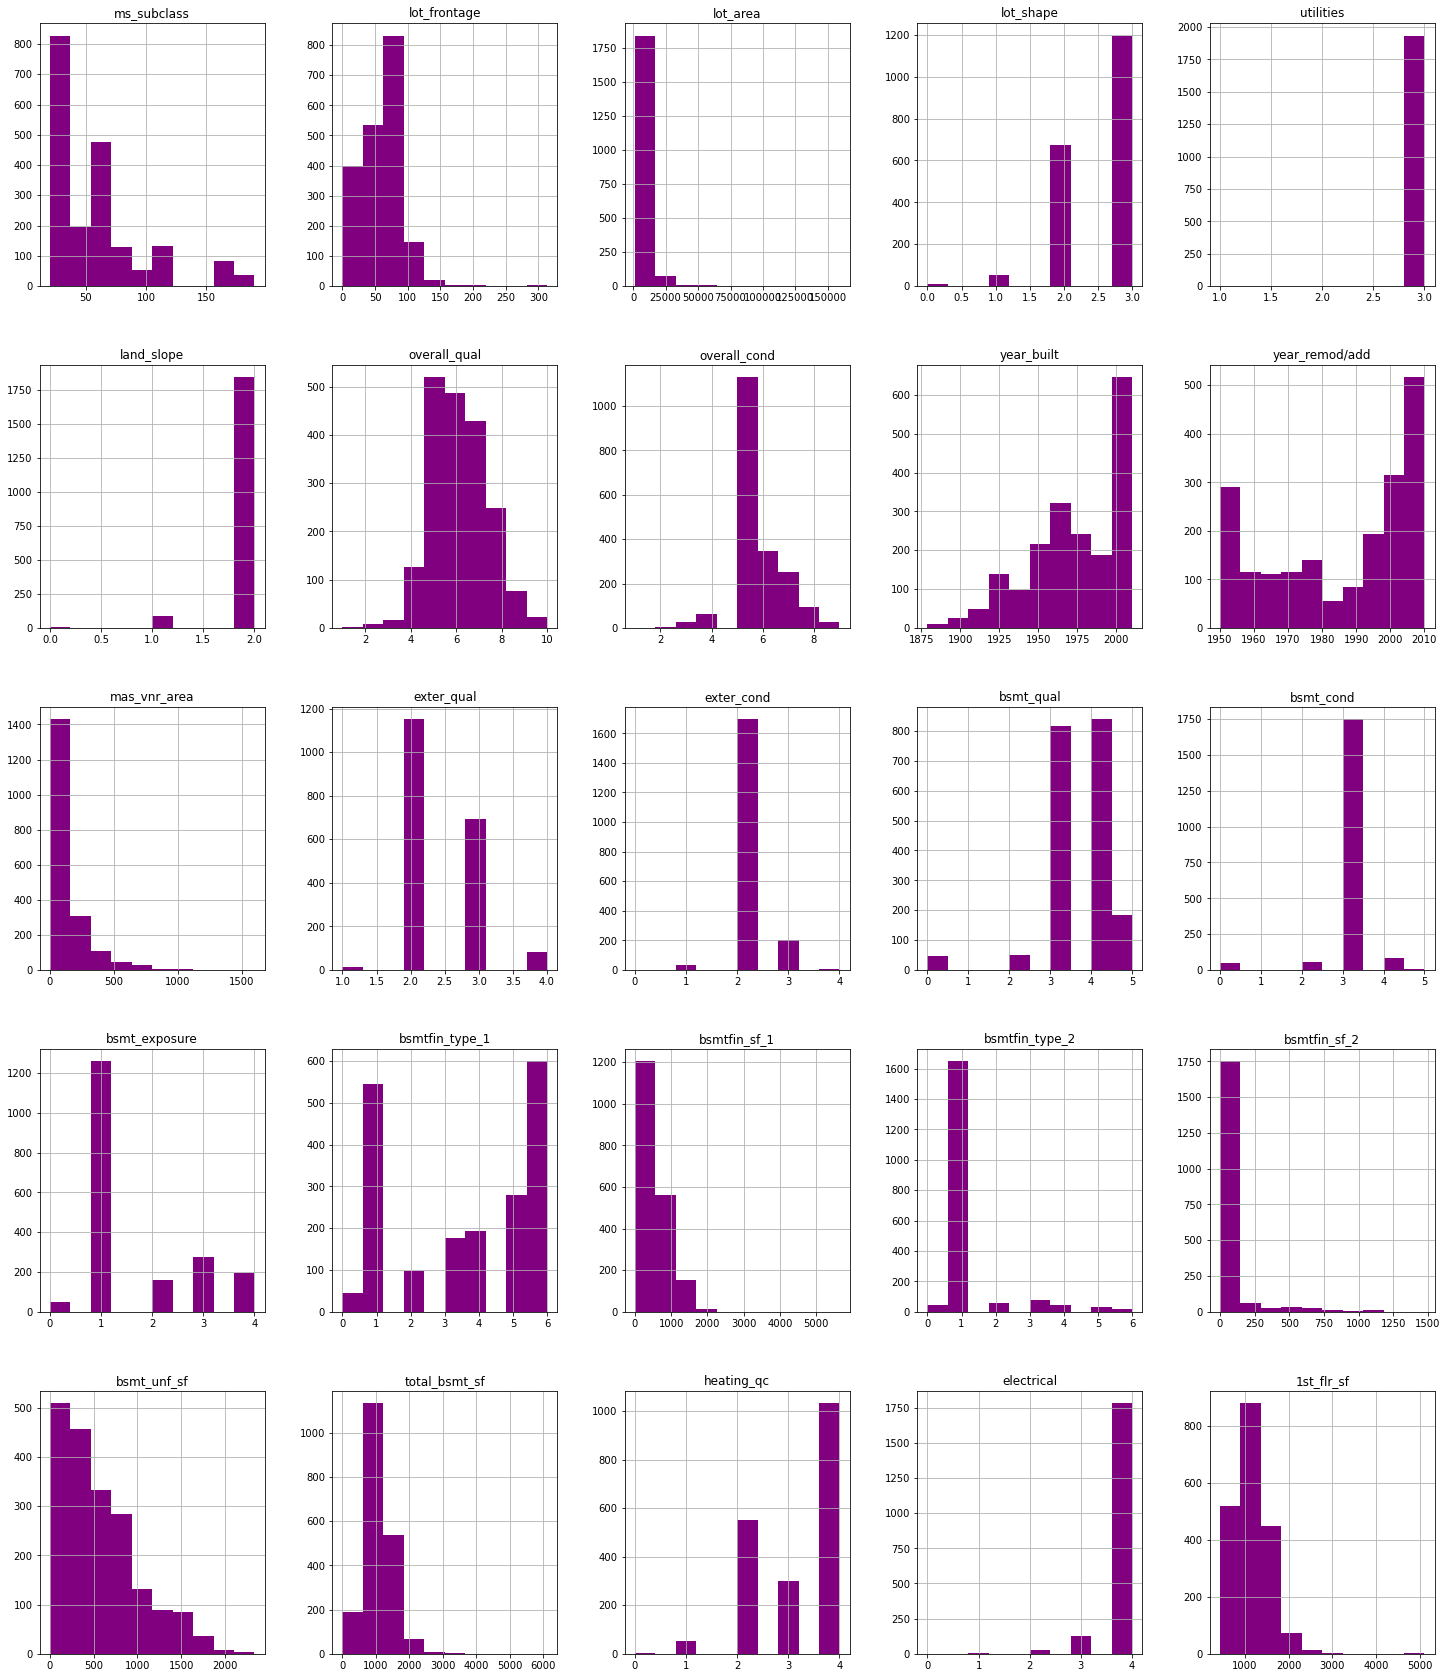

In [17]:
train[first_col[:25]].hist(figsize=(25,30), color = 'purple'); 

Only `overal_qual` looks like a normal distribution compared to the rest they seem to be left or right skewed

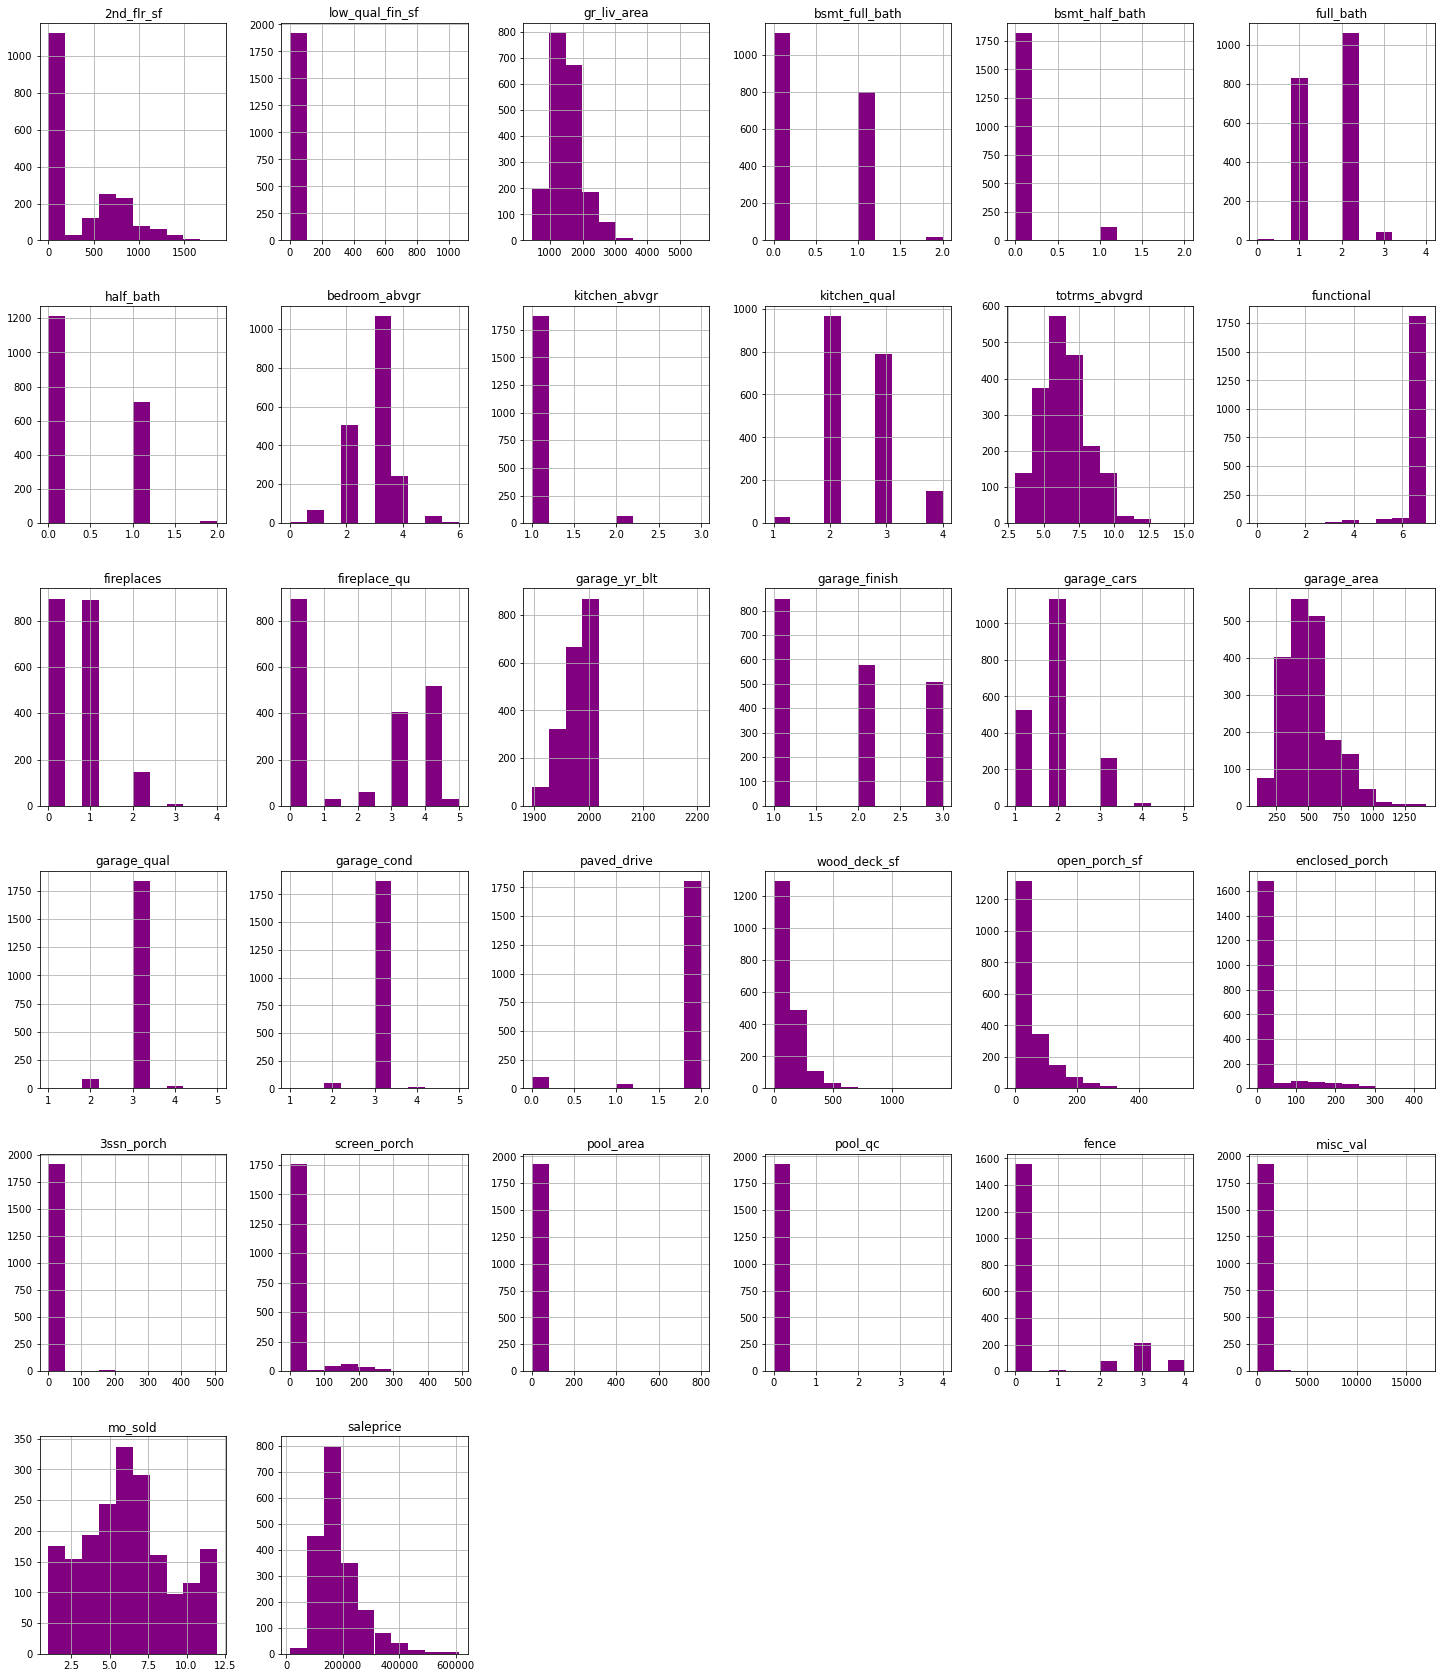

In [18]:
train[first_col[25:]].hist(figsize=(25,30), color = 'purple');

It is observed that only the `garage_area`, `gr_liv_area`, `mo_sold`, `saleprice` and `totrms_abvgrd` columns have largely normally distributed data. ` saleprice`, `garage_area`and `gr_liv_area` are negatively skewed. 

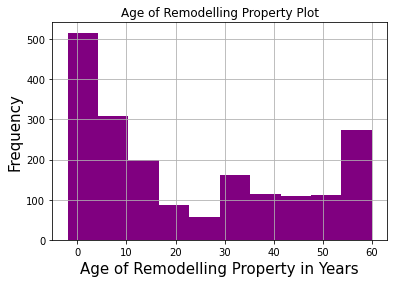

In [19]:
train['remod_age'].hist(color = 'purple')
plt.title("Age of Remodelling Property Plot");
plt.xlabel('Age of Remodelling Property in Years', fontsize=15);
plt.ylabel('Frequency', fontsize=15);

An analysis to check the histogram plot frequency of the age of remdelling property in years

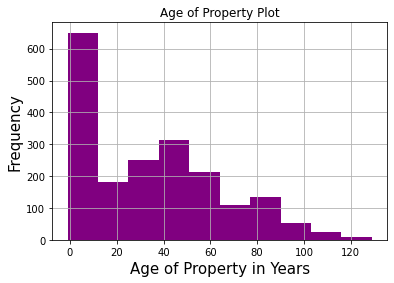

In [20]:
train['prop_age'].hist(color = 'purple')
plt.title("Age of Property Plot");
plt.xlabel('Age of Property in Years', fontsize=15);
plt.ylabel('Frequency', fontsize=15);

An analysis to check the histogram plot frequency of the age of property in years

### Feature Engineering - correlation heatmap

In [21]:
# assign first few columns of correlation
first_cor = train[first_col].corr()

In [22]:
#get correlation larger than 0.2 since there is more relationship here
first_cor = first_cor[first_cor['saleprice'] > 0.2][['saleprice']]

In [23]:
first_cor = first_cor.sort_values('saleprice', ascending=False)

In [24]:
#number of features for correlation > 0.2
len(first_cor.index)

33

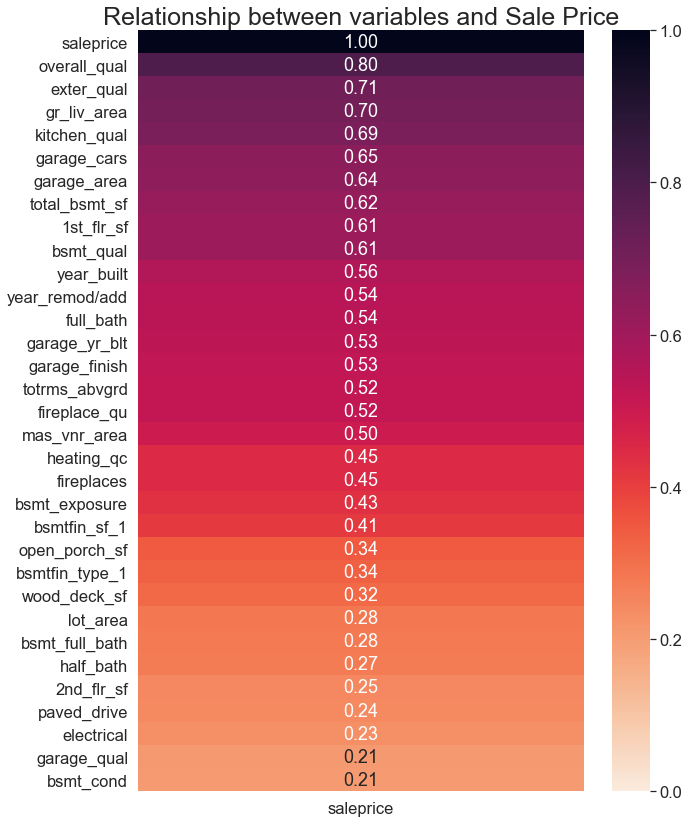

In [25]:
#plot heatmap
sns.set(font_scale=1.5)
plt.figure(figsize=(10,14));
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(first_cor,  vmin=0, vmax=1, cmap='rocket_r', annot=True, fmt='.2f');
plt.title('Relationship between variables and Sale Price', fontdict={'fontsize':25});

##### Positive correlation in first set of columns

First looking into the positive correlations. 

`overall_qual` comes to attention with a highest correlation of `0.8` which is expected to be positively correlated with the property price. 
A few quality metrics also stand out such as `exter_qual (0.71)`, `bsmt_qual (0.61)`, `kitchen_qual (0.69)` all having above `0.6` correlations. This shows that these different features of quality metrics can highly influence the property price. 

Size related features like `total_bsmt_sf`, `1st_flr_sf`, `gr_liv_area`, `totrms_abvgrd`, `full_bath` are also highly correlated, as expected. This shows that the larger the property and increasing the number of rooms and bathrooms, the higher the property price. 

The two garage features `garage_cars` and `garage_area` which denotes the size of garage, highly influences the property price as well. This is definitely true for USA since car ownership is very frequently used there. 

Interestingly, people value more how well the house is heated in winter than the size of the property on the second floor. `heating_qc` denoting heating quality and condition has much more influence on the price than the size of the property on the second floor. 

In [26]:
#get the subsequest columns after 59th column for looking at correlation
sec_col = list(train.columns[58:])
sec_cor = train[sec_col].corr()

In [27]:
#number of features for second correlation 
sec_cor.shape

(149, 149)

In [28]:
#get correlation < -0.2 or > 0.2
sec_cor_neg = sec_cor[(sec_cor['saleprice'] < -0.2) | (sec_cor['saleprice'] > 0.2)][['saleprice']]
sec_cor_neg = sec_cor_neg.sort_values('saleprice', ascending=False)

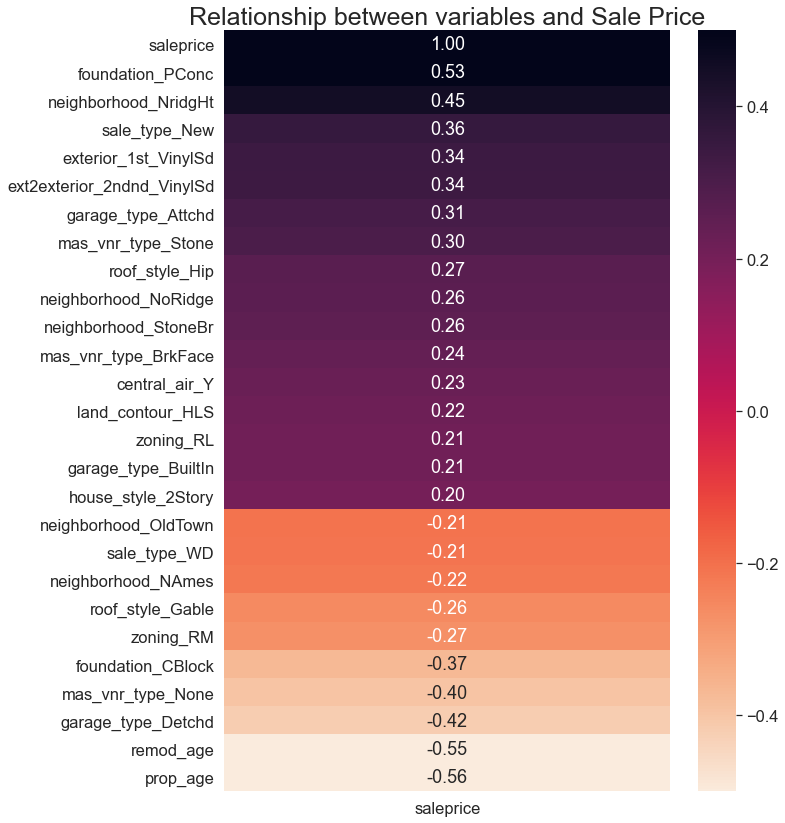

In [29]:
plt.figure(figsize=(10,14));
sns.heatmap(sec_cor_neg, vmin=-0.5, vmax=0.5, cmap='rocket_r' , annot=True,fmt='.2f');
plt.title('Relationship between variables and Sale Price', fontdict={'fontsize':25});

##### Negative correlation on the subsequent set of columns

The most negatively correlated features are the property age and age since property remodelling. This is no surprise here as the older the property, the lower the price. 

If the garage type is detached, it lowers the price too and has an inverse relationship with when it has a built in garage.  This makes sense as in times of rain or cold weather, it is more convenient to get to the car. 

It also looks like the properties in the neighbourhoods of Old Town and Nothern Ames are slightly lower in value. 

Interestingly, cinder block foundation (`foundation_CBlock`) has a negative relationship with price. Whereas poured concrete foundation (`foundation_PConc`) is on the opposite spectrum with a high positive relationship with price. Cinder block foundation is older and thus more costly to maintain than poured concrete foundation which explains the relationship.

In [30]:
#get positive correlation larger than > 0.2
sec_cor_pos = sec_cor[sec_cor['saleprice'] > 0.2][['saleprice']]
sec_cor_pos = sec_cor_pos.sort_values('saleprice', ascending=False)

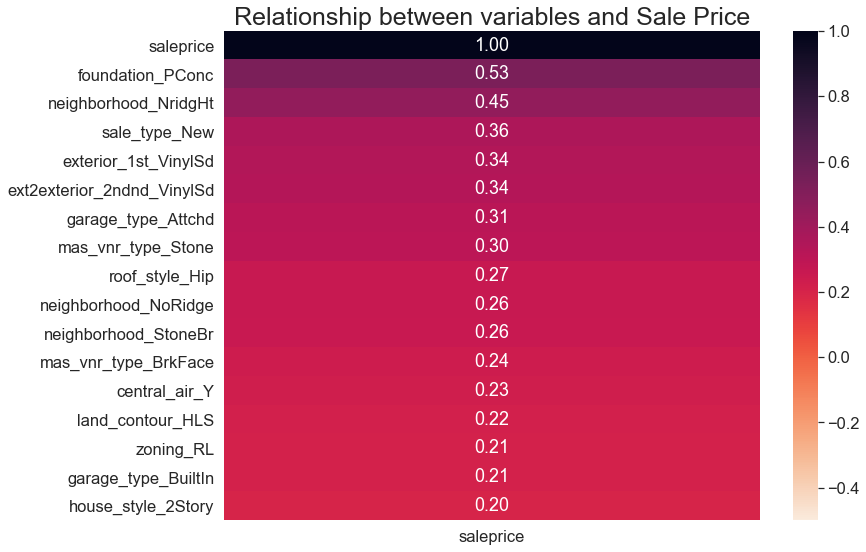

In [31]:
plt.figure(figsize=(12,9));
sns.heatmap(sec_cor_pos, vmin=-0.5, vmax=1, cmap='rocket_r', annot=True,fmt='.2f');

plt.title('Relationship between variables and Sale Price', fontdict={'fontsize':25});

##### Positive correlation on the subsequent columns

The next highest correlation after concrete foundation is `neighbourhood_NridgeHt` which is the neighbourhood of Northridge Heights. This means that a property there would influence the sale price to be higher. The other neighbourhoods such as Northridge and Stone Brook also positively influence the price, though not as high as Northridge Heights. 

The vinyl material that covers the exterior of the house also is slightly correlated to the price at a correlation value of `0.34`. On the topic of materials, a stone masonry veneer type, brick face masonry veneer type and hip roof style are also closely related to price. 

The interior that is covered by a central air-conditioning also plays apart in its property value, though not super high at a value of `0.23`.

In [32]:
print(len(sec_cor_neg))
len(first_cor)

27


33

In [33]:
interested_feat = [i.strip() for i in sec_cor_neg.index]
interested_feat.extend([i.strip() for i in first_cor.index])
#remove redundant features
interested_feat.remove('saleprice')
interested_feat.remove('saleprice')
#remove those year variables that are falsely treated as continous
interested_feat.remove('year_built')
interested_feat.remove('year_remod/add')
interested_feat.remove('garage_yr_blt')

In [34]:
len(interested_feat)

55

In [35]:
corr_feat = train[interested_feat].corr()
corr_feat = corr_feat[abs(corr_feat) > 0.6]

corr_feat.shape

(55, 55)

In [36]:
#dropping features that have no high correlation for ease of plotting graph
for col in corr_feat.columns:
    if corr_feat[col].isna().sum() == (corr_feat.shape[0]-1):
        corr_feat.drop(col, axis=0, inplace=True)
        corr_feat.drop(col, axis=1, inplace=True)
        

In [37]:
corr_feat.shape

(37, 37)

- Focusing on categorical columns on heatmap since they are on the same scale as categorical data and continuous data are not compatible for a heatmap. 

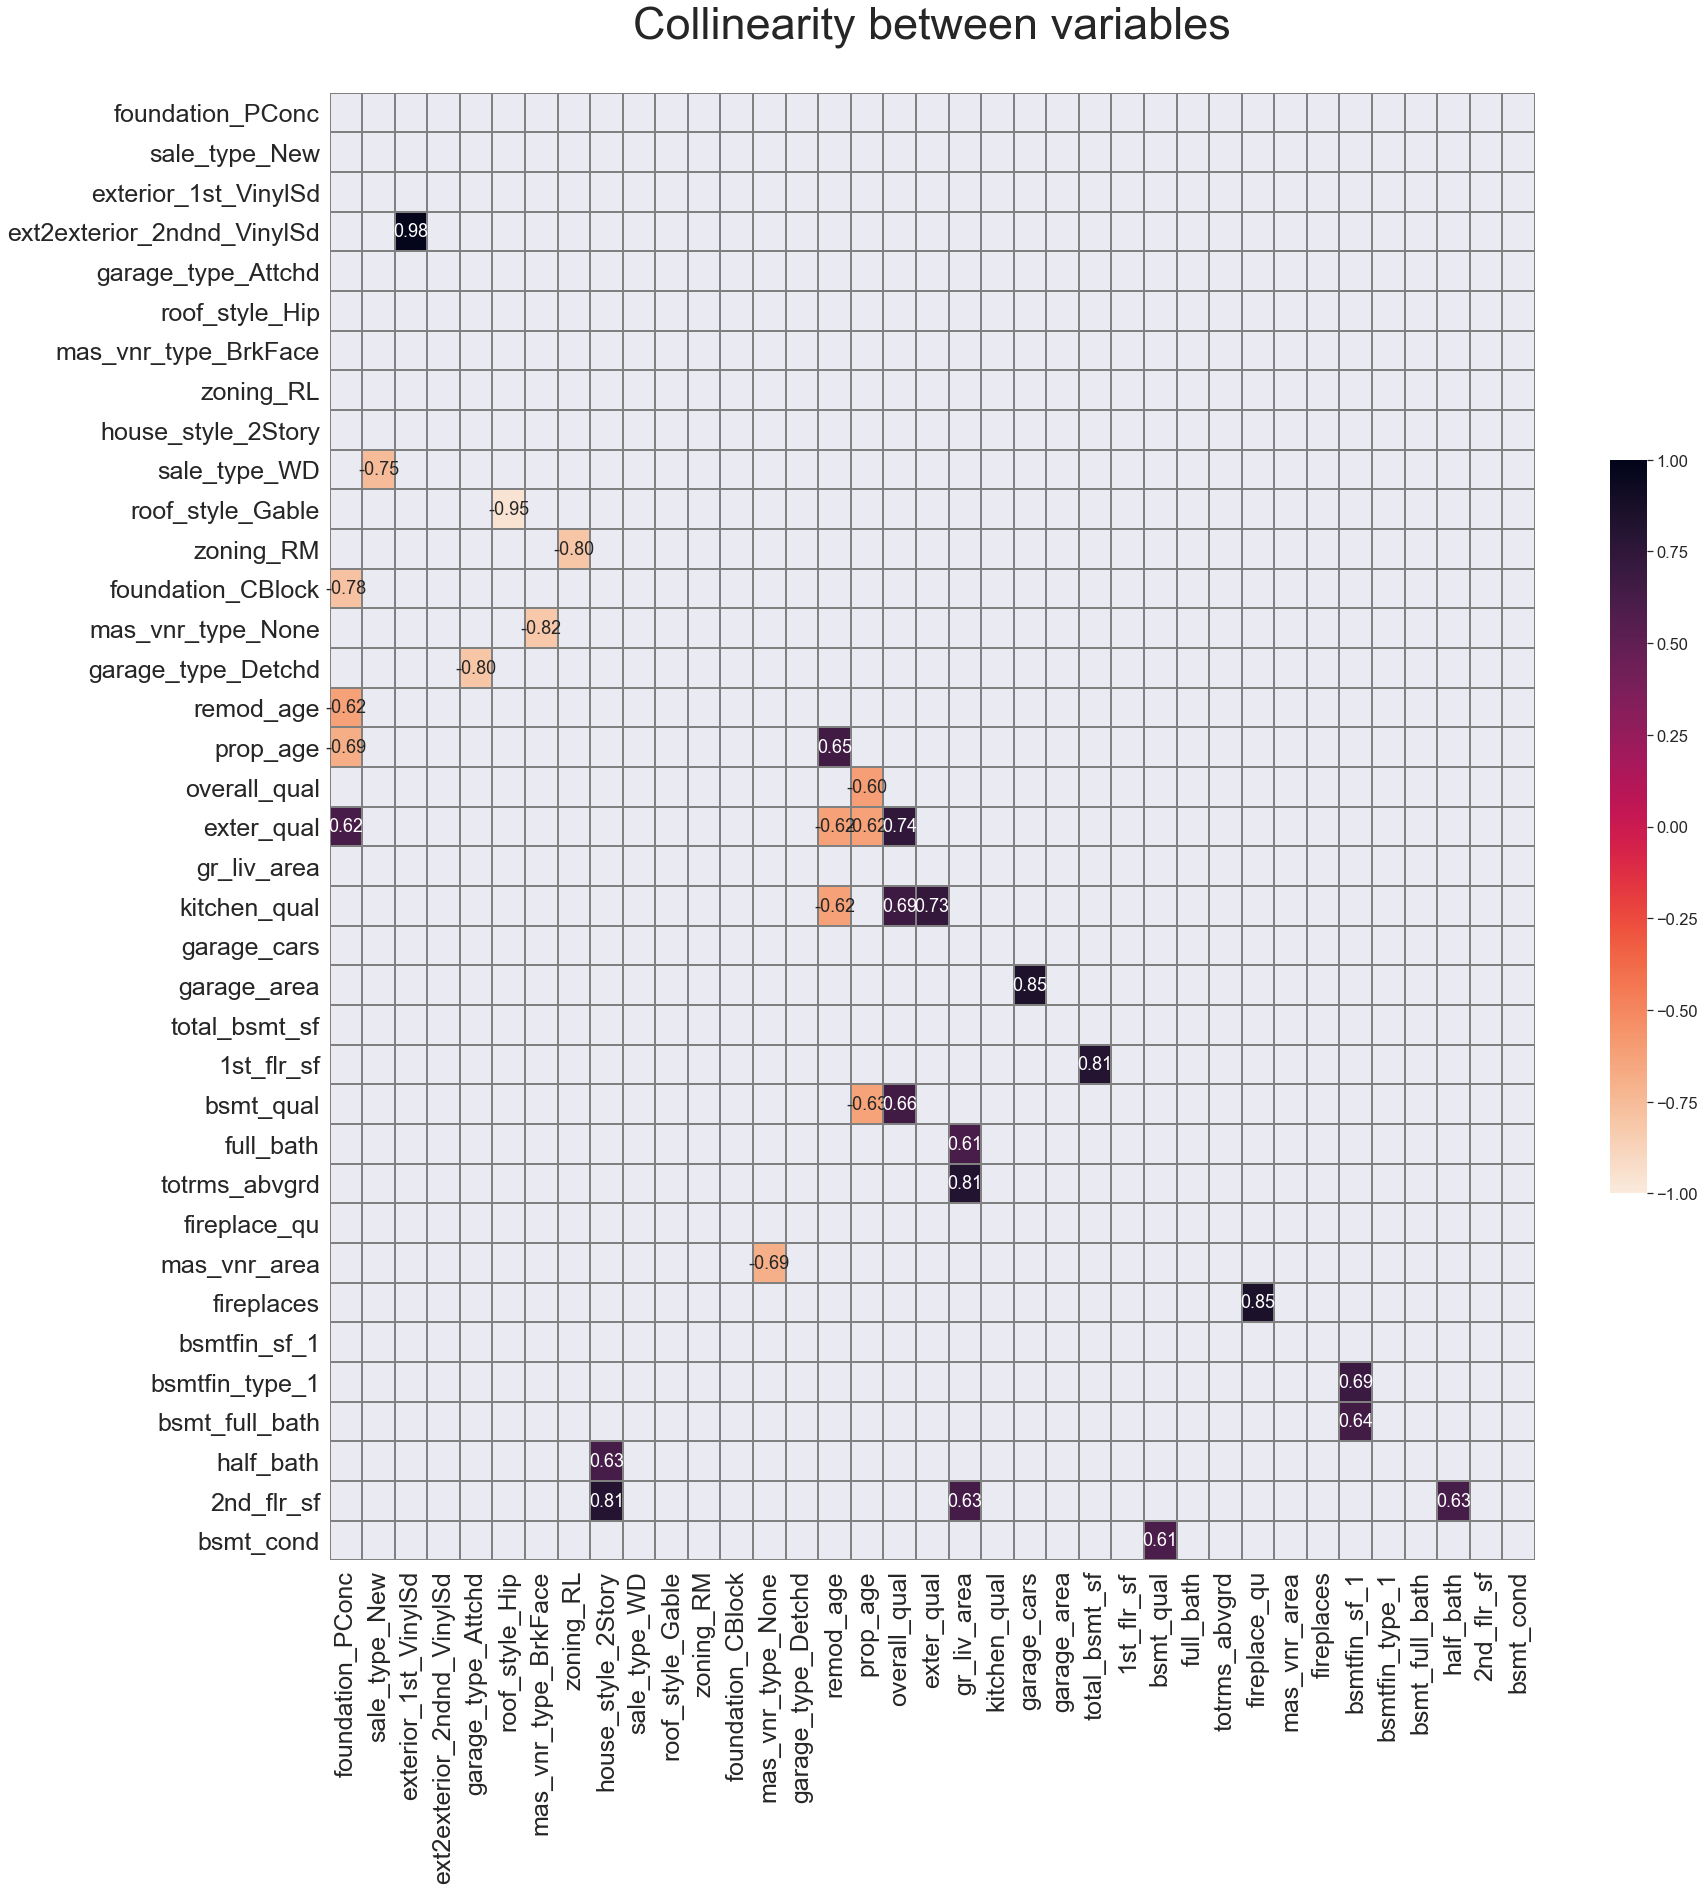

In [38]:
sns.set(font_scale=1.5)
fix, ax = plt.subplots(figsize=(27,27))
mask = np.zeros_like(corr_feat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr_feat, mask=mask, vmin=-1, vmax=1, cmap='rocket_r', annot=True,fmt='.2f', 
                 linewidths=1, linecolor='grey', cbar_kws={"shrink": 0.5} );#cbar_kws={"shrink": 0.5}
ax.tick_params(labelsize=25)
ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='major',      # both major and minor ticks are affected     
                labeltop=False,
                labelrotation='default'
)
plt.xticks(rotation='vertical');
plt.title('Collinearity between variables\n', fontdict={'fontsize':45});

In [39]:
if 'house_style_2Story' in interested_feat:
    print (True)
else:
    print (False)

True


In [40]:
#remove unwanted columns like sale types
interested_feat.remove('sale_type_New')
interested_feat.remove('sale_type_WD')

Dropping `house_style_2Story` because there is already a column, `2nd_flr_sf` denoting the same thing. If there it is a 2 story house, it will definitely have a square feet above 0 and vice versa. 

In [41]:
interested_feat.remove('house_style_2Story') 

For `garage_type_Attchd` and `garage_type_Detchd` columns, they represent if the garage they have is Attached to the house or not. Since they represent the same thing, one of them will be dropped, `garage_type_Attchd` which has the lowest absolute correlation. This would not affect the relationship between sale price and if the house has a garage or not, as this information is captured by another column `garage_area`.  

In [42]:
interested_feat.remove('garage_type_Attchd')

For `garage_area` and `garage_cars`, they have very high correlation simply because they are representing the same things, and it should also be dropping one of them, `garage_cars`, since `garage_area` wholly represents the garage area. 

In [43]:
interested_feat.remove('garage_cars')

Fireplaces and fireplace quality (`fireplace_qu`) are representing similar things, except that fireplace quality will encompass both if there is a fireplace and fireplace quality. So it can be debated if it would be dropping either columns since they are highly correlated. 

However there is another dimension that Fireplaces can represent, which is if the number of fireplaces influences the house price. Since the correlation of fireplace quality to the sale price is higher, `fireplaces` will be dropped. 

In [44]:
interested_feat.remove('fireplaces')

In [45]:
#total interested features in feeding into our model later on
len(interested_feat)

49

## Modelling

### Model prep: Creating features and target

In [46]:
# assigning features into train X
features = [col for col in interested_feat if col != 'saleprice']
X = train[features]
y = train['saleprice']

In [47]:
len(features)

49

In [48]:
print(X.shape)
print(y.shape)

(1937, 49)
(1937,)


### Model prep: Train/test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)

(1452, 49)
(485, 49)


### Model prep: Scale data

In [51]:
ss = StandardScaler()
#get the mean and std for training data
ss.fit(X_train) 
X_train = ss.transform(X_train)
#using mean and std of training data for transforming the data for test set
X_test = ss.transform(X_test)

### Actual Modelling

Instantiating of Linear Regression, Lasso Regression and Ridge Regression models. 

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
lasso = LassoCV(n_alphas=500)

In [54]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

#### Model comparison

In [55]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
print('Linear Regression R2 Train Score:', lr_scores.mean())

Linear Regression R2 Train Score: 0.7884353658983371


In [56]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

In [57]:
print('Lasso Regression R2 Train Score:', lasso_scores.mean())

Lasso Regression R2 Train Score: 0.7913218487318524


In [58]:
lasso.fit(X_train, y_train)

LassoCV(n_alphas=500)

In [59]:
print('Lasso Regression R2 Test Score:', lasso.score(X_test, y_test))

Lasso Regression R2 Test Score: 0.8866825054634689


In [60]:
lasso_coef_series = pd.Series(lasso.coef_, index=interested_feat).sort_values(ascending=False)

In [61]:
#number of features after lasso
lasso_coef_series[lasso_coef_series != 0].shape

(33,)

In [62]:
#features and their coefficients after lasso
lasso_coef_series

overall_qual                  16994.324201
gr_liv_area                   14865.433780
neighborhood_NridgHt           7887.983885
kitchen_qual                   7426.309877
exter_qual                     6886.839922
neighborhood_StoneBr           6330.885581
garage_area                    6246.627486
fireplace_qu                   5454.591742
bsmt_exposure                  5260.021378
lot_area                       4401.764684
neighborhood_NoRidge           4348.141952
roof_style_Hip                 3587.485879
totrms_abvgrd                  3071.891661
bsmt_full_bath                 2932.331363
bsmtfin_type_1                 2512.916219
land_contour_HLS               2376.910075
bsmt_qual                      2305.142770
1st_flr_sf                     2143.687516
bsmtfin_sf_1                   2009.035274
full_bath                      1652.522915
heating_qc                     1407.740728
mas_vnr_area                   1306.723822
garage_finish                  1271.129184
garage_qual

In [63]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print('Ridge Regression R2 Train Score:',ridge_scores.mean())

Ridge Regression R2 Train Score: 0.790623863430536


In [64]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [65]:
print('Ridge Regression R2 Test Score:', ridge.score(X_test, y_test))

Ridge Regression R2 Test Score: 0.8868494220051766


In [66]:
ridge_coef_series = pd.Series(ridge.coef_, index=interested_feat).sort_values(ascending=False)

In [67]:
#total number of features from ridge
ridge_coef_series[ridge_coef_series != 0].shape

(49,)

In [68]:
ridge_coef_series[ridge_coef_series != 0]

overall_qual                  16156.406773
mas_vnr_type_None              9555.052656
ext2exterior_2ndnd_VinylSd     9181.399406
neighborhood_NridgHt           8865.786454
gr_liv_area                    7415.488060
kitchen_qual                   7280.169655
neighborhood_StoneBr           6982.046120
exter_qual                     6556.709852
mas_vnr_type_BrkFace           6442.900814
bsmt_exposure                  6017.036761
roof_style_Hip                 5954.247637
fireplace_qu                   5721.681707
neighborhood_NoRidge           5641.691973
garage_area                    5541.854763
1st_flr_sf                     5503.825922
mas_vnr_type_Stone             5365.134934
lot_area                       5141.323488
totrms_abvgrd                  4131.664689
full_bath                      3777.309744
bsmt_qual                      3731.171492
bsmt_full_bath                 3622.947791
bsmtfin_type_1                 3466.322584
mas_vnr_area                   3021.770377
2nd_flr_sf 

All of them have higher scores in test scores than training scores, which is a good sign which shows that the model is not overfitting the training data too much. In the end, Ridge Regression has the best test score of 88.868%. 

Both Ridge and Lasso Regression have taken `overall_qual` as the top predictor of house prices. However, the top 5 predictors are different for both with Ridge Regression looking to have the top 3 to be quite logical. Overall quality of the house, and the type of vinylr used are influencing house prices positively. 

| Feature                    | Coefficient  | Model |
|----------------------------|--------------|-------|
| overall_qual               | 16156.406773 | Ridge |
| mas_vnr_type_None          | 9555.052656  | Ridge |
| ext2exterior_2ndnd_VinylSd | 9181.399406  | Ridge |


## Modelling - Lasso Regression

Through Lasso Regression, would be another method in weeding out the irrelevant features. 

Attempting to try to throw in all the features and see what are the columns that are regularised. 

### Model prep: Create features and target

In [69]:
#putting in all the features identified earlier on
features = [i for i in interested_feat if i != 'saleprice']
X = train[features]
y = train['saleprice']

In [70]:
X.shape

(1937, 49)

### Model prep: Train/test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model prep: Scale data

In [72]:
#scale the data
ss = StandardScaler()
ss.fit(X_train) #get the mean and std
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### Lasso Regression Modelling

In [73]:
#use a very high alpha to introduce a high penalty term
lasso = LassoCV(n_alphas=5000)

In [74]:
lasso.fit(X_train, y_train)

LassoCV(n_alphas=5000)

In [75]:
lasso_coef_features = pd.Series(lasso.coef_, index=features).sort_values(ascending=False)

In [76]:
lasso_coef_features

overall_qual                  16999.685858
gr_liv_area                   14878.547512
neighborhood_NridgHt           7882.817203
kitchen_qual                   7426.543069
exter_qual                     6888.563572
neighborhood_StoneBr           6326.066493
garage_area                    6249.373393
fireplace_qu                   5452.675030
bsmt_exposure                  5257.591159
lot_area                       4397.137964
neighborhood_NoRidge           4341.730118
roof_style_Hip                 3583.279643
totrms_abvgrd                  3067.406061
bsmt_full_bath                 2929.126004
bsmtfin_type_1                 2510.395706
land_contour_HLS               2372.459063
bsmt_qual                      2308.212550
1st_flr_sf                     2138.602439
bsmtfin_sf_1                   2010.702866
full_bath                      1645.783453
heating_qc                     1405.980831
mas_vnr_area                   1307.554068
garage_finish                  1273.475554
garage_qual

Features deemed to be not influential on the housing price (total of 8):

In [77]:
lasso_coef_features[lasso_coef_features == 0].sort_index().index

Index(['2nd_flr_sf', 'bsmt_cond', 'electrical', 'exterior_1st_VinylSd',
       'foundation_CBlock', 'foundation_PConc', 'garage_type_Detchd',
       'mas_vnr_type_BrkFace', 'mas_vnr_type_None', 'neighborhood_NAmes',
       'neighborhood_OldTown', 'open_porch_sf', 'paved_drive', 'prop_age',
       'roof_style_Gable', 'zoning_RL'],
      dtype='object')

In [78]:
new_feat = [i for i in lasso_coef_features.index if i not in 
            list(lasso_coef_features[lasso_coef_features == 0].index)]

Total number of relevant features chosen by Lasso Regression:

In [79]:
len(new_feat)

33

Text(0, 0.5, 'Ridge Residuals')

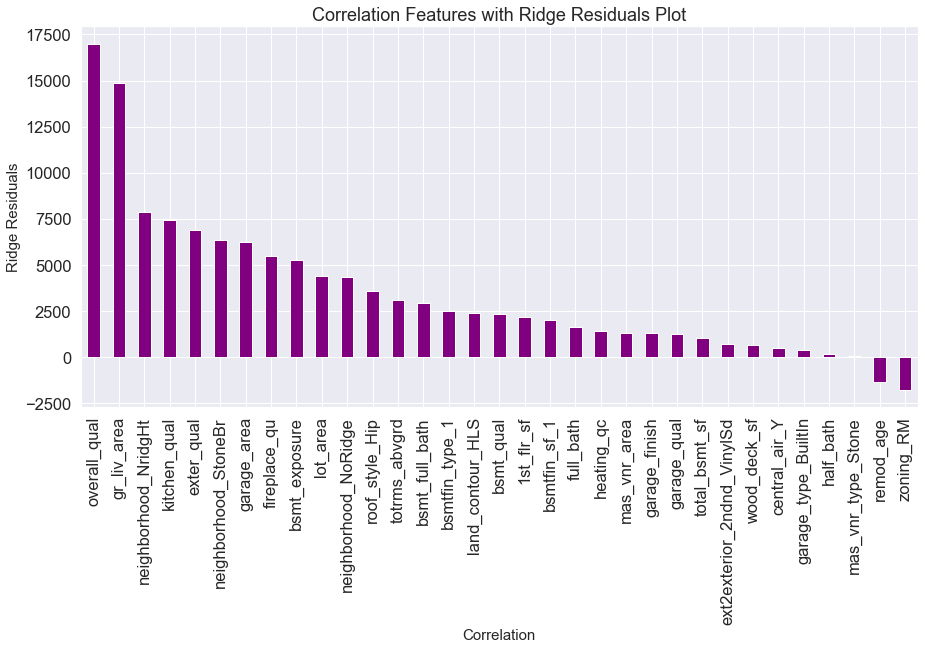

In [80]:
lasso_coef_features[new_feat].plot.bar(figsize=(15,7), color = 'Purple');
plt.title("Correlation Features with Ridge Residuals Plot");
plt.xlabel('Correlation', fontsize=15)
plt.ylabel('Ridge Residuals', fontsize=15)

In [81]:
lasso_coef_features[new_feat]

overall_qual                  16999.685858
gr_liv_area                   14878.547512
neighborhood_NridgHt           7882.817203
kitchen_qual                   7426.543069
exter_qual                     6888.563572
neighborhood_StoneBr           6326.066493
garage_area                    6249.373393
fireplace_qu                   5452.675030
bsmt_exposure                  5257.591159
lot_area                       4397.137964
neighborhood_NoRidge           4341.730118
roof_style_Hip                 3583.279643
totrms_abvgrd                  3067.406061
bsmt_full_bath                 2929.126004
bsmtfin_type_1                 2510.395706
land_contour_HLS               2372.459063
bsmt_qual                      2308.212550
1st_flr_sf                     2138.602439
bsmtfin_sf_1                   2010.702866
full_bath                      1645.783453
heating_qc                     1405.980831
mas_vnr_area                   1307.554068
garage_finish                  1273.475554
garage_qual

Running it one more time to ensure to bring down the number of features further:

In [82]:
X = train[new_feat]
y = train['saleprice']

In [83]:
X.shape

(1937, 33)

### Model prep: Train/test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model prep: Scale data

In [85]:
#scale the data
ss = StandardScaler()
ss.fit(X_train) #get the mean and std
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### Actual modelling

In [86]:
#Now using the alpha used earlier on
lasso = LassoCV(n_alphas=500, cv=10)

In [87]:
lasso.fit(X_train, y_train)

LassoCV(cv=10, n_alphas=500)

In [88]:
lasso_fe_2_coef = pd.Series(lasso.coef_, index=new_feat).sort_values(ascending=False)

Features deemed to be not influential on the housing price and further cut the features by another __10__:

In [89]:
lasso_fe_2_coef[lasso_fe_2_coef == 0].shape

(0,)

In [90]:
lasso_fe_2_coef[lasso_fe_2_coef != 0].shape

(33,)

In [91]:
#assign it to the final features
final_features = lasso_fe_2_coef[lasso_fe_2_coef != 0].index
final_features

Index(['overall_qual', 'gr_liv_area', 'neighborhood_NridgHt', 'kitchen_qual',
       'neighborhood_StoneBr', 'exter_qual', 'garage_area', 'fireplace_qu',
       'bsmt_exposure', 'neighborhood_NoRidge', 'lot_area', 'roof_style_Hip',
       'totrms_abvgrd', 'bsmt_full_bath', 'land_contour_HLS', 'bsmtfin_type_1',
       '1st_flr_sf', 'full_bath', 'bsmt_qual', 'bsmtfin_sf_1', 'garage_qual',
       'heating_qc', 'half_bath', 'mas_vnr_area', 'ext2exterior_2ndnd_VinylSd',
       'total_bsmt_sf', 'garage_finish', 'wood_deck_sf', 'central_air_Y',
       'garage_type_BuiltIn', 'mas_vnr_type_Stone', 'remod_age', 'zoning_RM'],
      dtype='object')

## Model prep: Initialise variables

In [92]:
#prepare our X and Y
X = train[final_features]
y = train['saleprice']

In [93]:
X.shape

(1937, 33)

## Model prep: Train/test Split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Lasso Regression: Find optimum alpha

In [95]:
# alphas = 10**np.linspace(6,-2,50)*0.5
alphas = np.logspace(-1, 10, 100)
alphas

array([1.00000000e-01, 1.29154967e-01, 1.66810054e-01, 2.15443469e-01,
       2.78255940e-01, 3.59381366e-01, 4.64158883e-01, 5.99484250e-01,
       7.74263683e-01, 1.00000000e+00, 1.29154967e+00, 1.66810054e+00,
       2.15443469e+00, 2.78255940e+00, 3.59381366e+00, 4.64158883e+00,
       5.99484250e+00, 7.74263683e+00, 1.00000000e+01, 1.29154967e+01,
       1.66810054e+01, 2.15443469e+01, 2.78255940e+01, 3.59381366e+01,
       4.64158883e+01, 5.99484250e+01, 7.74263683e+01, 1.00000000e+02,
       1.29154967e+02, 1.66810054e+02, 2.15443469e+02, 2.78255940e+02,
       3.59381366e+02, 4.64158883e+02, 5.99484250e+02, 7.74263683e+02,
       1.00000000e+03, 1.29154967e+03, 1.66810054e+03, 2.15443469e+03,
       2.78255940e+03, 3.59381366e+03, 4.64158883e+03, 5.99484250e+03,
       7.74263683e+03, 1.00000000e+04, 1.29154967e+04, 1.66810054e+04,
       2.15443469e+04, 2.78255940e+04, 3.59381366e+04, 4.64158883e+04,
       5.99484250e+04, 7.74263683e+04, 1.00000000e+05, 1.29154967e+05,
      

In [96]:
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=100000)

In [97]:
lassocv.fit(X_train, y_train)
print("Alpha =", lassocv.alpha_)
print("Train R2 Score: ", lassocv.score(X_train, y_train))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_train, lassocv.predict(X_train))))
print("best model coefficients:")
lasso_coef = pd.Series(lassocv.coef_, index=X.columns).sort_values(ascending=False)
lasso_coef

Alpha = 0.1
Train R2 Score:  0.8382289997690008
RMSE =  31491.06824827675
best model coefficients:


neighborhood_StoneBr          50854.220638
neighborhood_NridgHt          36013.798505
neighborhood_NoRidge          35657.394942
land_contour_HLS              15109.643564
overall_qual                  11592.801998
exter_qual                    11215.014833
kitchen_qual                  11200.627143
roof_style_Hip                10605.312421
garage_qual                    8164.695454
bsmt_full_bath                 6650.155440
bsmt_exposure                  5207.139328
full_bath                      4988.993273
central_air_Y                  4379.891497
garage_type_BuiltIn            3587.682002
half_bath                      3305.808041
fireplace_qu                   3198.543867
ext2exterior_2ndnd_VinylSd     2778.120793
mas_vnr_type_Stone             2528.962145
totrms_abvgrd                  2507.362357
bsmt_qual                      2058.775701
heating_qc                     1790.955341
bsmtfin_type_1                 1390.457222
garage_finish                  1090.278621
garage_area

In [98]:
print("Lasso final Test R2 Score: ", lassocv.score(X_test, y_test))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, lassocv.predict(X_test))))

Lasso final Test R2 Score:  0.887818735970489
RMSE =  27033.17555531613


In [99]:
lasso_pred = lassocv.predict(X_test)
lasso_residuals = y_test - lasso_pred

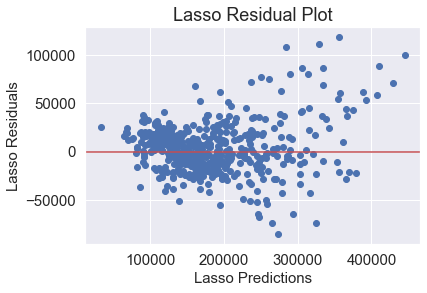

In [100]:
plt.scatter(lasso_pred, lasso_residuals);
plt.axhline(0, color='r');
plt.title("Lasso Residual Plot");
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Lasso Predictions', fontsize=15);
plt.ylabel('Lasso Residuals', fontsize=15);

## Ridge Regression: Find optimum alpha

In [101]:
ridge_alphas = np.logspace(0, 150, 200)
ridgecv = RidgeCV(alphas=ridge_alphas, cv=10)
ridgecv.fit(X_train, y_train)
print("Alpha =", ridgecv.alpha_)
print("Train R2 Score: ", ridgecv.score(X_train, y_train))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_train, ridgecv.predict(X_train))))
print("best model coefficients:")
pd.Series(ridgecv.coef_, index=X.columns).sort_values(ascending=False)

Alpha = 1.0
Train R2 Score:  0.8382072753413529
RMSE =  31493.182664538836
best model coefficients:


neighborhood_StoneBr          48643.082678
neighborhood_NridgHt          35089.636586
neighborhood_NoRidge          34101.801332
land_contour_HLS              15144.814840
overall_qual                  11663.700837
exter_qual                    11273.358234
kitchen_qual                  11230.256596
roof_style_Hip                10608.579700
garage_qual                    7989.032907
bsmt_full_bath                 6657.122771
bsmt_exposure                  5189.069461
full_bath                      4900.411967
central_air_Y                  4245.084183
garage_type_BuiltIn            3742.694969
half_bath                      3208.306854
fireplace_qu                   3199.916909
ext2exterior_2ndnd_VinylSd     2750.911369
totrms_abvgrd                  2500.758179
mas_vnr_type_Stone             2489.655889
bsmt_qual                      2079.638439
heating_qc                     1797.001372
bsmtfin_type_1                 1399.478400
garage_finish                  1088.161462
garage_area

In [102]:
print("Ridge R2 Test Score", ridgecv.score(X_test, y_test))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, ridgecv.predict(X_test))))

Ridge R2 Test Score 0.8880645221997637
RMSE =  27003.54482440874


In [103]:
ridge_pred = ridgecv.predict(X_test)
ridge_residuals = y_test - ridge_pred

Text(0, 0.5, 'Ridge Residuals')

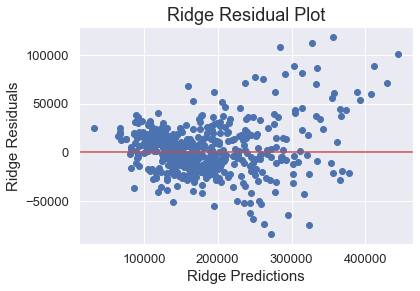

In [104]:
plt.scatter(ridge_pred, ridge_residuals);
plt.axhline(0, color='r');
plt.title("Ridge Residual Plot");
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel('Ridge Predictions', fontsize=15)
plt.ylabel('Ridge Residuals', fontsize=15)

## Model comparison

Ridge regression has the better R2 test score yet at 88.88% with RMSE at 27003.54 although it is not too far of from Lasso regression which has a R2 test score of 88.87% with RMSE at 27033.17 which shows that both regression models are applicable in this context to achieve results. With 33 features now, it is now more ideal and easy to explain to relevant stakeholders.  

Ridge Regression model also does not look to be overfitted as they perform better on the test score. 

### Residual plot analysis

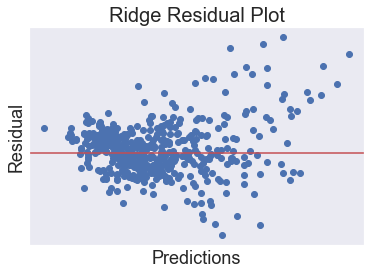

In [105]:
# Checking predicitons and residuals from ridge regression
plt.scatter(lasso_pred, ridge_residuals);
plt.axhline(0, color='r');
plt.title("Ridge Residual Plot", fontsize=20);
plt.xticks([]);
plt.yticks([]);
plt.xlabel('Predictions');
plt.ylabel('Residual');

Tryint to achieve a consistent variance between our low predictions and our high predictions and it can be observed that many of the points are overlapping each other towards the centre.  

## Conclusions

### Top 5 features from final Ridge Regression model 

The top feature that highly influences the price at a coefficient of 48643.08 is a property located at Stone Brooks neighbourhood. It is no wonder the best predictor as this neighbourhood is very convenient and is the closest to Iowa State University, the largest university in Iowa state. [[1]](https://en.wikipedia.org/wiki/Iowa_State_University) It is also very close to downtown and is just about a 10 minute drive away. The other two neighbourhoods, Northridge Heights and Northridge are situated close together and is slightly further away to then University but is equidistant to downtown as compared to Stone Brook neighbourhood. 
Moreover all three neighbourhoods are very close to elementary, middle and high schools and have amenities really close by. [[2]](https://www.google.com/maps/dir/304+Main+Street,+Ames,+IA/Northridge+Lane,+Ames,+IA/@42.0286767,-93.6589652,14.28z/data=!4m14!4m13!1m5!1m1!1s0x87ee7079a7344bb5:0xda5a2e61aea06f0d!2m2!1d-93.614092!2d42.024838!1m5!1m1!1s0x87ee70c37ac346ef:0x5c6a8eb7cb2ce524!2m2!1d-93.6467454!2d42.0478309!3e0?hl=en-US)

However, it is interesting to note that the land contour that is hilly is valued more than the other land contour features. It is perhaps has a good privacy rating among home dwellers in Ames. 

At top five, Overall Quality of the property takes the spot and is no suprise that it is one of the top predictors in property prices, though the coefficient is much lower than being in the top three neighbourhoods. 


| Feature              | Coefficient | Model |
|----------------------|-------------|-------|
| neighborhood_StoneBr | 48643.08    | Ridge |
| neighborhood_NridgHt | 35089.63    | Ridge |
| neighborhood_NoRidge | 34101.80    | Ridge |
| land_contour_HLS     | 15144.81    | Ridge |
| overall_qual         | 11663.70    | Ridge |

Therefore, it can be concluded that having a property in those top three neighbourhoods is way more important in highly influencing property prices than Overall Quality. 

### Recommendations 

It is important to note that the above conclusions are only based on the Ames housing dataset. More detailed analysis is not possible as the data provided are actual sale prices of houses. In order to complement the above findings, more detailed data such as buyer data and coordinates of home sales would be beneficial to deep dive into analysis such as buyer behaviour or neighbourhood studies. This could enable home owners or property developers to better target buyers, or to even educate buyers on the kind of houses they should look out for. 

With the right data, it can potentially be an exciting area to look into. 

# Predict from test set

In [106]:
test = pd.read_csv('../datasets/test_clean_enc.csv')

In [107]:
#calculate age of property
test['prop_age'] = test['yr_sold'] - test['year_built']
#calculate age since Remodel date
test['remod_age'] = test['yr_sold'] - test['year_remod/add']

In [108]:
test.columns = [col.strip() for col in test.columns]

In [109]:
test.head()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,zoning_C,zoning_FV,zoning_I,zoning_RH,zoning_RL,zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,ext2exterior_2ndnd_AsphShn,ext2exterior_2ndnd_Brk Cmn,ext2exterior_2ndnd_BrkFace,ext2exterior_2ndnd_CBlock,ext2exterior_2ndnd_CmentBd,ext2exterior_2ndnd_HdBoard,ext2exterior_2ndnd_ImStucc,ext2exterior_2ndnd_MetalSd,ext2exterior_2ndnd_Other,ext2exterior_2ndnd_Plywood,ext2exterior_2ndnd_PreCast,ext2exterior_2ndnd_Stone,ext2exterior_2ndnd_Stucco,ext2exterior_2ndnd_VinylSd,ext2exterior_2ndnd_Wd Sdng,ext2exterior_2ndnd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_None,misc_feature_Gar2,misc_feature_None,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,prop_age,remod_age
0,2658,902301120,190,69.0,9142,3,3,2,6,8,1910,1950,0.0,2,1,2,3,1,1,0.0,1,0.0,1020.0,1020.0,3,1,908,1020,0,1928,0.0,0.0,2,0,4,2,1,9,7,0,0,1910,1,1.0,440.0,1,1,2,0,60,112,0,0,0,0,0,0,4,2006,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,96,56
1,2718,905108090,90,0.0,9662,2,3,2,5,4,1977,1977,0.0,2,2,4,3,1,1,0.0,1,0.0,1967.0,196

In [110]:
X = test[final_features]

In [111]:
X.head()

,overall_qual,gr_liv_area,neighborhood_NridgHt,kitchen_qual,neighborhood_StoneBr,exter_qual,garage_area,fireplace_qu,bsmt_exposure,neighborhood_NoRidge,lot_area,roof_style_Hip,totrms_abvgrd,bsmt_full_bath,land_contour_HLS,bsmtfin_type_1,1st_flr_sf,full_bath,bsmt_qual,bsmtfin_sf_1,garage_qual,heating_qc,half_bath,mas_vnr_area,ext2exterior_2ndnd_VinylSd,total_bsmt_sf,garage_finish,wood_deck_sf,central_air_Y,garage_type_BuiltIn,mas_vnr_type_Stone,remod_age,zoning_RM
0,6,1928,0,1,0,2,440.0,0,1,0,9142,0,9,0.0,0,1,908,2,2,0.0,1,3,0,0.0,0,1020.0,1,0,0,0,0,56,1
1,5,1967,0,2,0,2,580.0,0,1,0,9662,0,10,0.0,0,1,1967,2,4,0.0,3,2,0,0.0,0,1967.0,3,170,1,0,0,29,0
2,7,1496,0,3,0,3,426.0,4,3,0,17104,0,7,1.0,0,6,664,2,4,554.0,3,4,1,0.0,1,654.0,2,100,1,0,0,0,0
3,5,968,0,2,0,3,480.0,0,1,0,8520,0,5,0.0,0,1,968,1,3,0.0,2,2,0,0.0,0,968.0,1,0,1,0,0,1,1
4,6,1394,0,2,0,2,514.0,4,1,0,9500,0,6,1.0,0,4,1394,1,4,609.0,3,3,1,247.0,0,1394.0,2,0,1,0,0,46,0


In [112]:
X.shape

(878, 33)

In [113]:
X_train.shape

(1452, 33)

In [114]:
X_train.head()

,overall_qual,gr_liv_area,neighborhood_NridgHt,kitchen_qual,neighborhood_StoneBr,exter_qual,garage_area,fireplace_qu,bsmt_exposure,neighborhood_NoRidge,lot_area,roof_style_Hip,totrms_abvgrd,bsmt_full_bath,land_contour_HLS,bsmtfin_type_1,1st_flr_sf,full_bath,bsmt_qual,bsmtfin_sf_1,garage_qual,heating_qc,half_bath,mas_vnr_area,ext2exterior_2ndnd_VinylSd,total_bsmt_sf,garage_finish,wood_deck_sf,central_air_Y,garage_type_BuiltIn,mas_vnr_type_Stone,remod_age,zoning_RM
1507,8,1504,0,3,0,3,510.0,0,1,0,10936,0,7,0.0,0,1,1504,2,4,0.0,3,4,0,60.0,1,1504.0,3,144,1,0,0,0,0
1899,4,874,0,2,0,2,576.0,0,1,0,7200,0,5,0.0,0,3,874,1,3,20.0,3,2,0,0.0,0,864.0,1,63,1,0,0,35,0
1187,8,1494,0,3,0,3,478.0,4,4,0,9466,0,5,1.0,0,2,1494,1,4,457.0,3,4,1,0.0,0,1494.0,3,0,1,0,0,12,0
1509,8,1278,0,3,0,3,584.0,0,1,0,8640,0,5,0.0,0,6,1278,2,4,24.0,3,4,0,0.0,1,1278.0,2,0,1,0,0,0,0
1775,5,1125,0,2,0,2,430.0,0,1,0,8536,0,5,0.0,0,1,1125,1,4,0.0,3,3,1,0.0,1,1125.0,1,80,1,0,0,0,0


In [115]:
ss = StandardScaler()
ss.fit(X_train) #get the mean and std
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X)

In [120]:
ridge_alphas = np.logspace(0, 150, 200)
ridgecv_test = RidgeCV(alphas=ridge_alphas, cv=10)
ridgecv_test.fit(X_train, y_train)
print("Alpha =", ridgecv_test.alpha_)
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, ridgecv.predict(X_test))))
print("best model coefficients:")
pd.Series(ridgecv_test.coef_, index=X.columns).sort_values(ascending=False)

Alpha = 1.0
RMSE =  27003.54482440874
best model coefficients:


neighborhood_StoneBr          48643.082678
neighborhood_NridgHt          35089.636586
neighborhood_NoRidge          34101.801332
land_contour_HLS              15144.814840
overall_qual                  11663.700837
exter_qual                    11273.358234
kitchen_qual                  11230.256596
roof_style_Hip                10608.579700
garage_qual                    7989.032907
bsmt_full_bath                 6657.122771
bsmt_exposure                  5189.069461
full_bath                      4900.411967
central_air_Y                  4245.084183
garage_type_BuiltIn            3742.694969
half_bath                      3208.306854
fireplace_qu                   3199.916909
ext2exterior_2ndnd_VinylSd     2750.911369
totrms_abvgrd                  2500.758179
mas_vnr_type_Stone             2489.655889
bsmt_qual                      2079.638439
heating_qc                     1797.001372
bsmtfin_type_1                 1399.478400
garage_finish                  1088.161462
garage_area

In [117]:
test_predictions = ridgecv_test.predict(X_test_ss)
submit_test = pd.DataFrame(test['id'])
submit_test['saleprice'] = test_predictions

In [118]:
submit_test.to_csv('../datasets/submit_reg_ridge.csv', index=False)